# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
my_data = np.loadtxt('../../Catalogue/Match07_smalldoubleclean_emlines.csv', delimiter=',', dtype=str)

In [3]:
my_dictionary = {}
for i in range(len(my_data[0, :])):                                         # Converting numpy array into dictionary
    my_dictionary[my_data[0, i]] = np.array(my_data[0 + 1:, i], dtype=str)

In [4]:
print my_data.shape
print my_data.size
print my_data[0,:]

(14332, 164)
2350448
['CATAID' 'OBJID_SDSSDR7' 'ALPHA_J2000' 'DELTA_J2000' 'KRON_RADIUS'
 'PETRO_RADIUS' 'MAG_PETRO_u' 'MAGERR_PETRO_u' 'FLAGS_u' 'MAG_PETRO_g'
 'MAGERR_PETRO_g' 'FLAGS_g' 'MAG_PETRO_r' 'MAGERR_PETRO_r' 'FLAGS_r'
 'MAG_PETRO_i' 'MAGERR_PETRO_i' 'FLAGS_i' 'MAG_PETRO_z' 'MAGERR_PETRO_z'
 'FLAGS_z' 'MAG_PETRO_X' 'MAGERR_PETRO_X' 'FLAGS_X' 'MAG_PETRO_Y'
 'MAGERR_PETRO_Y' 'FLAGS_Y' 'MAG_PETRO_J' 'MAGERR_PETRO_J' 'FLAGS_J'
 'MAG_PETRO_H' 'MAGERR_PETRO_H' 'FLAGS_H' 'MAG_PETRO_K' 'MAGERR_PETRO_K'
 'FLAGS_K' 'FLAGS' 'PSFMAG_R' 'FIBERMAG_R' 'FLAGS_R_SDSS' 'PETRORAD_R'
 'PETROR90_R' 'PETROR50_R' 'PETROMAG_R' 'MODELMAG_U' 'MODELMAG_G'
 'MODELMAG_R' 'MODELMAG_I' 'MODELMAG_Z' 'STATUS' 'BEST_MAG_NUV'
 'BEST_MAGERR_NUV' 'BEST_MAG_FUV' 'BEST_MAGERR_FUV' 'BEST_METHOD'
 'NMATCHUV' 'NMATCHOPT' 'NUVFLAG' 'FUVFLAG' 'NN_DIST' 'NN_NMATCH4'
 'NN_MANY2ONE' 'NN_SFLAGS_NUV' 'NN_SFLAGS_FUV' 'KCORR_FUV' 'KCORR_NUV'
 'KCORR_U' 'KCORR_G' 'KCORR_R' 'KCORR_I' 'KCORR_Z' 'KCORR_Y' 'KCORR_J'
 'KCORR_H' 'KC

In [5]:
redshift     = my_dictionary['Z'].astype(float)
cataid       = my_dictionary['CATAID'].astype(str)
z_prob       = my_dictionary['PROB'].astype(float)
z_quality    = my_dictionary['NQ'].astype(int)
fuv_band     = my_dictionary['MAG_AB_FUV'].astype(float)   
nuv_band     = my_dictionary['MAG_AB_NUV'].astype(float)
u_band       = my_dictionary['MAG_AB_U'].astype(float)
g_band       = my_dictionary['MAG_AB_G'].astype(float)
r_band       = my_dictionary['MAG_AB_R'].astype(float)
mag_abs_r    = my_dictionary['MAG_ABSOLUTE_R'].astype(float)
stellar_mass = my_dictionary['logmstar'].astype(float)   # stellar mass from sed fitting - log scale
stellar_age  = my_dictionary['logage'].astype(float)     # stellar age - log scale
stellar_met  = my_dictionary['metal'].astype(float)      # stellar metallicity
dn4000       = my_dictionary['D4000N'].astype(float)     
h_alpha_flux = my_dictionary['HA_FLUX_COMP'].astype(float)    
h_alpha_ew   = my_dictionary['HA_EW_COMP'].astype(float)      
h_beta_flux  = my_dictionary['HB_FLUX_COMP'].astype(float)    
h_beta_ew    = my_dictionary['HB_EW_COMP'].astype(float)      
nii_flux     = my_dictionary['NIIR_FLUX_COMP'].astype(float)  # R for red or 6583A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
oiii_flux    = my_dictionary['OIIIR_EW_COMP'].astype(float)   # R for red or 5007A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
uv_class     = my_dictionary['UV_CLASS_YI2011'].astype(str)
whan_class   = my_dictionary['WHAN_CLASS'].astype(str)

In [6]:
print np.unique(uv_class)
print np.unique(whan_class)

['RSF' 'UV_UPTURN' 'UV_WEAK']
['NA' 'Retired/Passive' 'SF' 'sAGN' 'wAGN']


In [7]:
print my_data[:,0].shape

(14332,)


In [8]:
idx_uvup   = np.where(uv_class=='UV_UPTURN')
idx_uvwk   = np.where(uv_class=='UV_WEAK')
idx_redseq = list(idx_uvup[0]) + list(idx_uvwk[0])

In [9]:
bins = np.arange(0, (redshift[idx_uvup]).max(), 0.05)
average_redshift = []
z_uvup_all = []
z_sf = []
z_sa = []
z_wa = []
z_rp = []
z_na = []
ratio_sf = []
ratio_wa = []
ratio_sa = []
ratio_rp = []
ratio_na = []
z_uvup = redshift[idx_uvup]
z_sf   = z_uvup[np.where(whan_class[idx_uvup]=='SF')]
z_sa   = z_uvup[np.where(whan_class[idx_uvup]=='sAGN')]
z_wa   = z_uvup[np.where(whan_class[idx_uvup]=='wAGN')]
z_rp   = z_uvup[np.where(whan_class[idx_uvup]=='Retired/Passive')]
z_na   = z_uvup[np.where(whan_class[idx_uvup]=='NA')]

In [10]:
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ])

In [11]:
for i in range(bins.size):
    if i==0:
        continue
    else:
        index_uvup_i = np.where((bins[i-1]<=z_uvup)*(z_uvup<=bins[i])) 
        index_sf_i   = np.where((bins[i-1]<=z_sf)*(z_sf<=bins[i]))
        index_sa_i   = np.where((bins[i-1]<=z_sa)*(z_sa<=bins[i]))
        index_wa_i   = np.where((bins[i-1]<=z_wa)*(z_wa<=bins[i]))
        index_rp_i   = np.where((bins[i-1]<=z_rp)*(z_rp<=bins[i]))
        index_na_i   = np.where((bins[i-1]<=z_na)*(z_na<=bins[i]))
        z_bin_uvup   = z_uvup[index_uvup_i]
        z_bin_sf     = z_sf[index_sf_i]
        z_bin_sa     = z_sa[index_sa_i]
        z_bin_wa     = z_wa[index_wa_i]
        z_bin_rp     = z_rp[index_rp_i]
        z_bin_na     = z_na[index_na_i]
        
        if (z_bin_uvup.size==0):
            ratio_sf_i = 0
            ratio_sa_i = 0
            ratio_wa_i = 0
            ratio_rp_i = 0
            ratio_na_i = 0
            print "There are no UV Upturn galaxies in this range of redshift: %.2f and %.2f" % (bins[i-1], bins[i])
        else:
            ratio_sf_i = (np.float(z_bin_sf.size)/np.float(z_bin_uvup.size))*100
            ratio_sa_i = (np.float(z_bin_sa.size)/np.float(z_bin_uvup.size))*100
            ratio_wa_i = (np.float(z_bin_wa.size)/np.float(z_bin_uvup.size))*100
            ratio_rp_i = (np.float(z_bin_rp.size)/np.float(z_bin_uvup.size))*100
            ratio_na_i = (np.float(z_bin_na.size)/np.float(z_bin_uvup.size))*100 
        ratio_sf.append(ratio_sf_i)
        ratio_sa.append(ratio_sa_i)
        ratio_wa.append(ratio_wa_i)
        ratio_rp.append(ratio_rp_i)
        ratio_na.append(ratio_na_i)
ratio_sf = np.array(ratio_sf)
ratio_sa = np.array(ratio_sa)
ratio_wa = np.array(ratio_wa)
ratio_rp = np.array(ratio_rp)
ratio_na = np.array(ratio_na)

There are no UV Upturn galaxies in this range of redshift: 0.00 and 0.05


In [12]:
plotpars5 = {'axes.linewidth': 1.,
             'axes.labelsize': 18,
             'xtick.labelsize': 18,
             'ytick.labelsize': 18,
             'legend.frameon': True,
             'legend.framealpha': 0.85,
             'legend.edgecolor': 'black',
             'legend.loc': 'upper right',
             'legend.fontsize': 12,
             'font.size':12,
             'figure.figsize': (15, 4)
             }

In [13]:
palette = ['#018571', '#80cdc1', '#dfc27d', '#a6611a', 'gray']
fit_palette = ['#e0ecf4','#9ebcda','#8856a7']
alphas  = float(0.85)

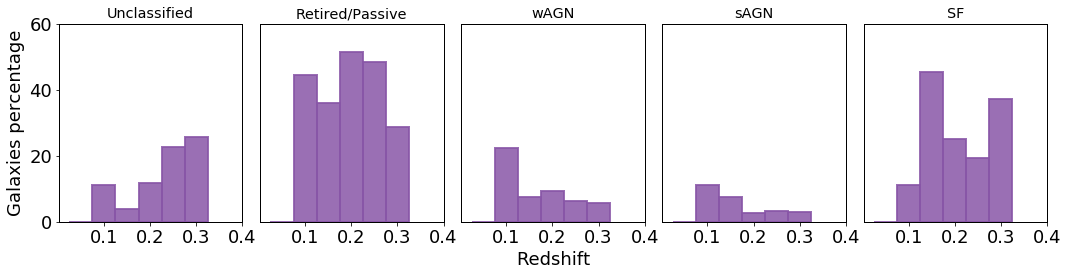

In [14]:
n_groups = bins.size
index    = np.arange(1, n_groups, 1)

plt_idxs  = [2, 4, 6, 8]
plt_ticks = [0.1, 0.2, 0.3, 0.4]
ylims = [0.0, 60.]
xlims = [0.05, 0.4]
yticks = list(np.arange(ylims[0], ylims[1], 10))

plt.rcParams.update(plotpars5)

ax1=plt.subplot(1,5,5)
plt.bar(index, ratio_sf, width=1., alpha=alphas, color=fit_palette[2], edgecolor=fit_palette[2], linewidth=2., 
        label='SF')
plt.title('SF')
ax1.yaxis.set_visible(False)
plt.ylim(ylims)
plt.xlim(xlims)
plt.xticks(plt_idxs, plt_ticks)
plt.yticks(yticks)
plt.tick_params('both')

ax2=plt.subplot(1,5,4)
plt.bar(index, ratio_sa, width=1., alpha=alphas, color=fit_palette[2], edgecolor=fit_palette[2], linewidth=2.,
        label='sAGN')
plt.title('sAGN')
ax2.yaxis.set_visible(False)
plt.ylim(ylims)
plt.xlim(xlims)
plt.xticks(plt_idxs, plt_ticks)
plt.tick_params('both')

ax3=plt.subplot(1,5,3)
plt.bar(index, ratio_wa, width=1., alpha=alphas, color=fit_palette[2], edgecolor=fit_palette[2], linewidth=2.,
        label='wAGN')
plt.title('wAGN')
ax3.yaxis.set_visible(False)
plt.ylim(ylims)
plt.xlim(xlims)
plt.xticks(plt_idxs, plt_ticks)
plt.tick_params('both')
plt.xlabel("Redshift")

ax4=plt.subplot(1,5,2)
plt.bar(index, ratio_rp, width=1., alpha=alphas, color=fit_palette[2], edgecolor=fit_palette[2], linewidth=2.,
        label='Retired/Passive')
plt.title('Retired/Passive')
ax4.yaxis.set_visible(False)
plt.ylim(ylims)
plt.xlim(xlims)
plt.xticks(plt_idxs, plt_ticks)
plt.tick_params('both')

ax5=plt.subplot(1,5,1)
plt.bar(index, ratio_na, width=1., alpha=alphas, color=fit_palette[2], edgecolor=fit_palette[2], linewidth=2.,
        label='Unclassified')
plt.ylabel("Galaxies percentage")
plt.title('Unclassified')
plt.ylim(ylims)
plt.xlim(xlims)
plt.xticks(plt_idxs, plt_ticks)
plt.tick_params('both')

plt.tight_layout(w_pad=0.)
plt.savefig('../../Figs/g2_barplot_propuv.png')
plt.savefig('../../Figs/g2_barplot_propuv.pdf')
plt.show()